In [16]:
import warnings

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [10]:
x1=pd.read_csv("Copy of Irradiance-1MW-5Min-2014.csv",header=None)

x2=pd.read_csv("Copy of Irradiance-1MW-5Min-2015.csv",header=None)

X=pd.concat([x1,x2],ignore_index=True)

In [11]:
y=pd.read_csv("11MW-GenerationFile-5Min.csv",header=None)
y1=y.iloc[:,[4]].values
y2=y.iloc[:,[5]].values
y3=y.iloc[:,[6]].values
y4=y.iloc[:,[7]].values
y5=y.iloc[:,[8]].values
y6=y.iloc[:,[9]].values
y_np=y2+y3+y4+y5+y6
y_np=pd.DataFrame(y_np)

In [12]:
y=y_np.iloc[1152:2305 , :]
X1=X.iloc[1152:2593 , :]

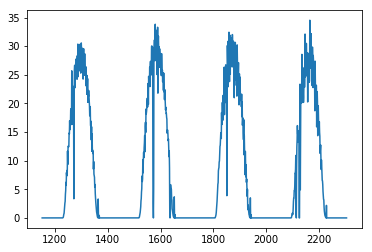

In [13]:
plt.plot(y)

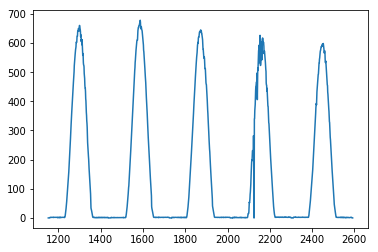

In [14]:
plt.plot(X1)

In [15]:
X1= X1.values

In [16]:
X1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
train_size = int(len(X) * 0.80)

In [19]:
train, test = X[0:train_size], X[train_size:]
# walk-forward validation

history = [x for x in train]
predictions = list()

In [20]:
for i in range(len(test)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

ValueError: Insufficient degrees of freedom to estimate

In [15]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

ValueError: Insufficient degrees of freedom to estimate

In [23]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model=’multiplicative’)
fig = result.plot()
plot_mpl(fig)

SyntaxError: invalid character in identifier (<ipython-input-23-b0d74e9794c4>, line 3)

In [22]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(X1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid'

Actual=0.000000, Predicted=-0.097077
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=-0.000000
Actual=0.000000, Predicted=0.000000
Actual=0.000000, Predicted=-0.000000
Actual=2.200000, Predicted=-0.000000
Actual=2.000000, Predicted=3.004358
Actual=2.000000, Predicted=1.270017
Actual=2.600000, Predicted=2.594956
Actual=2.200000, Predicted=2.771998
Actual=2.400000, Predicted=1.875809
Actual=2.600000, Predicted=2.739714
Actual=2.400000, Predicted=2.517666
Actual=2.600000, Predicted=2.317149
Actual=2.000000, Predicted=2.782922
Actual=3.000000, Predicted=1.673818
Actual=2.400000, Predicted=3.594819
Actual=2.400000, Predicted=1.737649
Actual=2.400000, Predicted=2.823599
Actual=2.000000, Predicted=2.255803
Actual=2.000000, Predicted=1.855184
Actual=2.000000, Predicted=2.120823
Actual=2.000000, Predicted=1.904106
Actual=2.000000, Predicted=2.001176
Actual=2.000000, Predi

Actual=2.000000, Predicted=2.000919
Actual=1.600000, Predicted=2.000919
Actual=1.600000, Predicted=1.445029
Actual=1.600000, Predicted=1.713746
Actual=1.400000, Predicted=1.494465
Actual=1.400000, Predicted=1.322790
Actual=2.000000, Predicted=1.457147
Actual=2.000000, Predicted=2.181324
Actual=2.000000, Predicted=1.831395
Actual=2.000000, Predicted=2.160325
Actual=1.800000, Predicted=2.000913
Actual=1.600000, Predicted=1.722985
Actual=2.000000, Predicted=1.579434
Actual=2.000000, Predicted=2.159974
Actual=1.800000, Predicted=1.834781
Actual=1.600000, Predicted=1.829224
Actual=2.000000, Predicted=1.579430
Actual=1.400000, Predicted=2.159983
Actual=2.000000, Predicted=1.000930
Actual=2.000000, Predicted=2.510254
Actual=1.200000, Predicted=1.671961
Actual=1.800000, Predicted=1.048568
Actual=2.000000, Predicted=2.260401
Actual=2.000000, Predicted=1.696690
Actual=2.000000, Predicted=2.103806
Actual=2.000000, Predicted=2.054007
Actual=1.000000, Predicted=2.000902
Actual=1.600000, Predicted=0

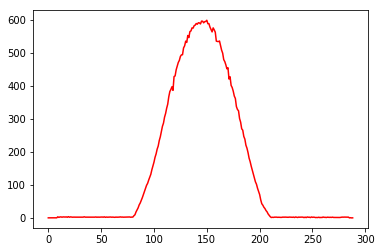

In [23]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
    
#Get exchange rates
ActualData = X1
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 8% of data as training, rest 2% to Test model
TrainingSize = int(NumberOfElements * 0.8)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
#pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

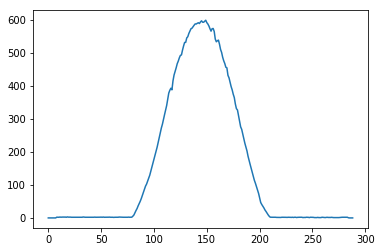

In [24]:
plt.plot(TestData)

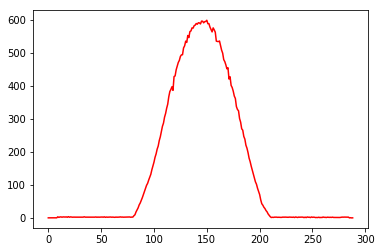

In [25]:
plt.plot(Predictions,color='red')

In [26]:
predictions

[]

In [27]:
Predictions

[array([-0.09707659]),
 array([0.]),
 array([1.58284084e-07]),
 array([-2.17663368e-07]),
 array([-3.84077502e-17]),
 array([-3.84077143e-17]),
 array([3.84077047e-17]),
 array([-7.68153542e-17]),
 array([-3.84076444e-17]),
 array([3.00435807]),
 array([1.27001669]),
 array([2.59495637]),
 array([2.77199792]),
 array([1.87580937]),
 array([2.73971375]),
 array([2.51766589]),
 array([2.31714888]),
 array([2.78292162]),
 array([1.67381836]),
 array([3.59481932]),
 array([1.73764939]),
 array([2.82359877]),
 array([2.25580275]),
 array([1.85518381]),
 array([2.12082281]),
 array([1.90410599]),
 array([2.00117616]),
 array([2.00117464]),
 array([2.00117409]),
 array([2.00117323]),
 array([2.00117154]),
 array([2.00117057]),
 array([2.00116985]),
 array([2.00116923]),
 array([3.09362169]),
 array([2.01609341]),
 array([2.16898713]),
 array([2.02375096]),
 array([1.90409538]),
 array([2.00116286]),
 array([2.00116209]),
 array([2.00116073]),
 array([2.00115955]),
 array([2.00115851]),
 array